<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Евгений! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
К сожалению в твоя работа практически полностью совпадает с работой студентки первого потока.  Я сам проверял эту работу, поэтому уверен. Перед тем, как написать тебе еще раз сличил, вижу что отличия самые небольшие - гдето заменены имена перменных, где-то вместо обычной функции используется лямбда.  Но т.к. сам подход диаметрально отличается от того, что рекомендован авторами проекта, то все критичные шаги идентичны.
    
Прошу тебя перерабоать проект:    
    
- EDA - исследуем данные, особенно оценки экспертов и краудсорсинговые. Отвечаем на вопросы
 - Количество уникальных изображений в обучающем и тестовом наборах
 - Количество уникальных запросов  
 - Количество оценок в экспертном и краудсорсинговом наборах.
     
    
 - Прошу разобраться как свяаны между собой query_id и image b и построить очистку датасета от детских изображений на использовании этой взаимосвязи 
 
    
В качестве основного и единственного DL фрейморка прошу использовать pytorch
    
 - Векторизацию изображений прошу провести с помощью resnet18 (прекод). Но советую отрезать только один последний слой от модели, тогда размерность признаков будет 512.
 - Векторизацию текстов можешь оставить TF-IDF или BERT
    
    
По поводу подхода можешь повторить подгод Маргариты (если перепишешь его на torch) или используй подход, который рекомендован авторами проекта:
    
 - Объединяем признаки полученные из текстов и изображений в один длинный вектор.
 - Строим и обучаем модели, способные предсказывать меру соответствия по новому длинному вектору
 - Для итогового тестирования нужно построить функцию, которая принимает на вход текст, а выдает наиболее полходящее изображение из всех тестовых изображений + меру сходства.
    
    
Если ты не согласен с моим решением или хочешь обсудить границы переделки проекта - свяжись со мной через куратора.   

</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Привет Дмитрий. Я полностью переделал проект, постарался учесть все твои рекомендации.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>

Привет! Давай посмотрим, что получилось</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента v2:</b> Привет, постарался поправить все замечания, но возникли проблемы с темтированием, опишу ниже.
</div>

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

##  1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке: 

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке. 
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Я бы убрал установку этих библиотек из проекта. Прична простая - установка библиотек в локальное окружение производится только один раз (самый первый). И tf и torch уже установлены в среде Практикума (если брать её как эталонную), а также в большинстве облачных сред для обучения моделей (например Colab).  
    
Я вижу, что некоторые библиотеки ты не используешь (например tensorflow)
    
Ну а если от установки библиотек не ответтеться, можно запустить с флагом -q и уменьшить количество логов    
    
    !pip install -q transformers catboost optuna keras-tuner
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента v2:</b> Здесь была проблема с torchvision, думал использовать, но потом отказался от этой идеи. Установки убрал.  
</div>

In [1]:
import math
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import pandas as pd
import re
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from PIL import Image
import random
from scipy.spatial import distance
from os.path import join
from pathlib import Path


import torchvision
import torch
import torch.nn as nn
import torchvision.models as models
from PIL import Image
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm import tqdm, tqdm_notebook 
from torchvision import transforms
from sklearn.preprocessing import  StandardScaler 

Загружаем библиотеки

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

###  1.1 Тренировочные данные

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:
 
    
  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием этой константы, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).
   
Чтобы запустить твой код при проверке я был вынужден руками менять код по всему ноутбуку. Прошу тебя внести изменения так, чтобы путь к данным нужно было изменять всего один раз.


</div>

Загрузим данные, и посмотрим на них. 

In [2]:
dp = Path("C:/Users/79099/Desktop/Image Search/to_upload")

In [3]:
train_images = Path("C:/Users/79099/Desktop/Image Search/to_upload/train_images") 
test_images = Path("C:/Users/79099/Desktop/Image Search/to_upload/test_images")

In [4]:
df_train = pd.read_csv(join(dp, 'train_dataset.csv'))
df_train.head(5)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


В загруженном файле train_dataset.csv собрана информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат <имя файла изображения>#<порядковый номер описания>. Всего мы видим 3 столбца и 5822 строки, пропуски отсутствуют.

In [6]:
df_train.describe()

,image,query_id,query_text
count,5822,5822,5822
unique,1000,977,977
top,488356951_b3b77ad832.jpg,2600867924_cd502fc911.jpg#2,"Two dogs , one brown and white and one black a..."
freq,10,34,34


Тренировочные данные содержат 1000 уникальных изображений и 977 уникальных идентефикаторов и столько же уникальных описаний к ним.

Поскольку у нас уникальных идентефикаторов "query_id" меньше чем уникальных изображений, то следовательно часть опиманий могла не попасть в выборку.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Скорее это говорит о том, что часть описаний просто не попала в выборку</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента v2:</b> Да, возможно и так, вывод поправил.  
</div>

Сделаем срез по одному описанию и посмотрим на результат.

In [7]:
df_id = df_train.query("query_id == '2549968784_39bfbe44f9.jpg#2'")

In [8]:
df_id

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
5,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
6,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
7,3222041930_f642f49d28.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
8,343218198_1ca90e0734.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
9,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


Получилось, что только одно название файла изображения соответствует названию "query_id"

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не уверен, что правильно тебя понял. Один query_id однозначно определяет query_text.  </div>

<div class="alert alert-block alert-info">
<b>Комментарий студента v2:</b> Да, один query_id однозначно определяет query_text, это подразумевалось условием. Я обратил внимание на сходство названий: <b>2549968784_39bfbe44f9</b>.jpg (изображение) <b>2549968784_39bfbe44f9</b>.jpg#2 (query_id), такой фаил один, но с этим "id" есть комментарии к другим изображениям. Можно удалить этот блок, но оставил чтобы комментарии были предметными.      
</div>

###  1.2 Оценки соответствия

Посмотрим теперь на оценки соответствия этих изображений.

In [9]:
expert_annotations = pd.read_csv(join(dp, 'ExpertAnnotations.tsv'), sep='\t', header=None)
expert_annotations.head(5)

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


Переименуем колонки.

In [10]:
expert_annotations.columns = ['image', 'query_id', 'ex_1', 'ex_2', 'ex_3']
expert_annotations.head(5)

,image,query_id,ex_1,ex_2,ex_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


Посчитаем среднюю оценку экспертов.

In [11]:
expert_annotations['mean_ex'] = expert_annotations[['ex_1', 'ex_2', 'ex_3']].mean(axis=1) 

Теперь посмотрим сводные результаты.

In [12]:
expert_annotations.describe()

,ex_1,ex_2,ex_3,mean_ex
count,5822.000000,5822.000000,5822.000000,5822.000000
mean,1.436620,1.624356,1.881999,1.647658
std,0.787084,0.856222,0.904087,0.806205
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000,1.333333
75%,2.000000,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000


Средняя оценка экспертов не высока и составляет 1,64 и только в 25% случаев эксперты в среднем дают оценку 2 и выше.

Построим гистограмму.

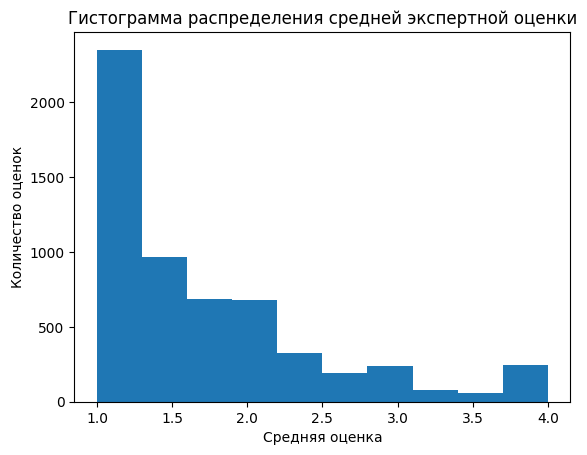

In [13]:
plt.hist(expert_annotations['mean_ex'], bins=10)
plt.title('Гистограмма распределения средней экспертной оценки')
plt.xlabel('Средняя оценка')
plt.ylabel('Количество оценок')
plt.show()

Гистограмма показывает правильность предварительных выводов, действительно преобладают низкие оценки.

Приведёи среднюю оценку эксперта к значениям от 0 до 1

In [14]:
expert_annotations['mean_ex'] = (expert_annotations['mean_ex'] - 1)/(4-1)

Теперь посмотрим какие результаты мы имеем в по итогу краудсорсинговой оценке.

In [15]:
crowd_annotations = pd.read_csv(join(dp, 'CrowdAnnotations.tsv'), sep='\t', header=None)
crowd_annotations.head(5)

,0,1,2,3,4
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


In [16]:
crowd_annotations.columns = ['image', 'query_id', 'image_correct_percent', 'count_correspond', 'count_not_correspond']
crowd_annotations.head(5)

,image,query_id,image_correct_percent,count_correspond,count_not_correspond
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


В тыблице crowd_annotations содержатся следующие данные: 

- Имя файла изображения.
- Идентификатор описания.
- Доля людей, подтвердивших, что описание соответствует изображению.
- Количество человек, подтвердивших, что описание соответствует изображению.
- Количество человек, подтвердивших, что описание не соответствует изображению.

In [17]:
crowd_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image                  47830 non-null  object 
 1   query_id               47830 non-null  object 
 2   image_correct_percent  47830 non-null  float64
 3   count_correspond       47830 non-null  int64  
 4   count_not_correspond   47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


Данные разбиты на 5 столбцов и 47830 строк.

In [18]:
crowd_annotations.describe()

,image_correct_percent,count_correspond,count_not_correspond
count,47830.000000,47830.000000,47830.000000
mean,0.068786,0.208488,2.820155
std,0.207532,0.628898,0.656676
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000
50%,0.000000,0.000000,3.000000
75%,0.000000,0.000000,3.000000
max,1.000000,5.000000,6.000000


Как мы видим в среднем около 7% подтвердили соответствие изображения описанию.  

Построим гистограмму.

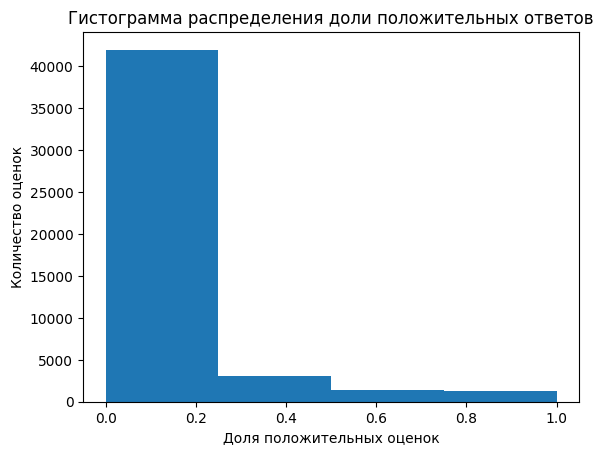

In [19]:
plt.hist(crowd_annotations['image_correct_percent'], bins=4)
plt.title('Гистограмма распределения доли положительных ответов')
plt.xlabel('Доля положительных оценок')
plt.ylabel('Количество оценок')
plt.show()

Картина примерно похожа на то, что мы видели на гистограмме оценок экспертов.

Теперь попробуем выявить общую закономерность, для этого сначала объеденим таблицы "expert_annotations" и "crowd_annotations" по столбцам "image" и "query_id" способом "left" 

In [20]:
final_annotations = pd.merge(expert_annotations, crowd_annotations,
                     on=['image', 'query_id'], how='outer')

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Обрати внимание, что используя left_join ты теряешь 80% краудсорс оценок, которые тоже можно было использовать для обучения модели. Нужно только аккуратно разобрать три случая
    
  - есть краудсорс оценка,  нет экспертной - берем краудсорс
  - есть экспертная, нет краудсорс - берем экспертную
  - есть обе оценки - берем взвешенное среднее
    
    
А еще можно немного обогатить данные парами изображение-описание, где имя изображения и queri_id содержат одно имя, т.е вида img_name.jpg : img_name.jpg#2. Это изображение и написанное для него описание, которые заведомо подходят друг к другу.
    
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента v2:</b> Сделал по первому варианту.  
</div>

In [21]:
final_annotations.head(5)

,image,query_id,ex_1,ex_2,ex_3,mean_ex,image_correct_percent,count_correspond,count_not_correspond
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1.0,1.0,1.0,0.000000,0.0,0.0,3.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1.0,1.0,2.0,0.111111,0.0,0.0,3.0
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1.0,1.0,2.0,0.111111,NaN,NaN,NaN
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1.0,2.0,2.0,0.222222,NaN,NaN,NaN
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1.0,1.0,2.0,0.111111,NaN,NaN,NaN


In [22]:
final_annotations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51323 entries, 0 to 51322
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image                  51323 non-null  object 
 1   query_id               51323 non-null  object 
 2   ex_1                   5822 non-null   float64
 3   ex_2                   5822 non-null   float64
 4   ex_3                   5822 non-null   float64
 5   mean_ex                5822 non-null   float64
 6   image_correct_percent  47830 non-null  float64
 7   count_correspond       47830 non-null  float64
 8   count_not_correspond   47830 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.9+ MB


Получим взвешенную оценку: там где отсутствуют оценки эксперта, берём краудсорсинговую, там где нет краудсорсинговой берём экспертную, где есть и та и другая берём взвешенную.

In [23]:
for i in range(len(final_annotations['query_id'])):
    if  math.isnan(final_annotations.loc[i,('mean_ex')]):
        final_annotations.loc[i,('estimation')] = final_annotations.loc[i,('image_correct_percent')]
    elif math.isnan(final_annotations.loc[i,('image_correct_percent')]):
        final_annotations.loc[i,('estimation')] = final_annotations.loc[i,('mean_ex')]
    else:
        final_annotations.loc[i,('estimation')] = final_annotations.loc[i,('mean_ex')]*0.6 + final_annotations.loc[i,('image_correct_percent')]*0.4

        
    
    

In [24]:
final_annotations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51323 entries, 0 to 51322
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image                  51323 non-null  object 
 1   query_id               51323 non-null  object 
 2   ex_1                   5822 non-null   float64
 3   ex_2                   5822 non-null   float64
 4   ex_3                   5822 non-null   float64
 5   mean_ex                5822 non-null   float64
 6   image_correct_percent  47830 non-null  float64
 7   count_correspond       47830 non-null  float64
 8   count_not_correspond   47830 non-null  float64
 9   estimation             51323 non-null  float64
dtypes: float64(8), object(2)
memory usage: 6.3+ MB


Удалим лишние столбцы.

In [25]:
final_annotations = final_annotations.drop(['ex_1', 'ex_2', 'ex_3', 'count_correspond','count_not_correspond', 'mean_ex', 'image_correct_percent' ], axis=1) 

In [26]:
final_annotations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51323 entries, 0 to 51322
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       51323 non-null  object 
 1   query_id    51323 non-null  object 
 2   estimation  51323 non-null  float64
dtypes: float64(1), object(2)
memory usage: 3.6+ MB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> Краудсорс и экспертные оценки объеденины, получена взвешенная оценка. </div>

###  1.3 Тестовые данные

In [27]:
test_queries = pd.read_csv(join(dp, 'test_queries.csv'), sep='|', index_col=0)
test_queries.head(5)

,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


In [28]:
test_queries.describe()

,query_id,query_text,image
count,500,500,500
unique,500,500,100
top,973827791_467d83986e.jpg#0,"A person with blue hair , a baseball cap , and...",3044359043_627488ddf0.jpg
freq,1,1,5


Тестовые данные содержат 100 уникальных изображений и 500 уникальных описаний к ним.

###  1.4 Вывод

Были проведены: первичное знакомство с данными и статистический анализ. В результате данного анализа были выявлены:

- Тренировочные данные содержат 1000 уникальных изображений и 977 уникальных идентефикаторов и столько же уникальных описаний к ним.

- Прямо пропорциональная зависимость между экспертными оценками и оценками краудсорсинга. После чего была расчитана единая оценка на основе вышеуказанных оценок.

- Тестовые данные содержат 100 уникальных изображений и 500 уникальных описаний к ним.

- Эксперты сделали 5822 оценки

- В результате краудсорсинга получено 47830 оценок.


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success"> EDA получилось раскиданным на два раздела, но я вижу что ты неплохо познакомился с данными.. </div>

## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

This image is unavailable in your country in compliance with local laws

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

Для того чтобы это сделать, составим список слов, которые могут характеризовать детей, проверим наличие 

Для удобства в дальнейшем, объеденим тренировочные данные и полученую нами таблицу "final_annotations", после чего удалим лишние столбцы с оценками, которые нам больше не нужны.

In [29]:
df_training = pd.merge(df_train, final_annotations,
                     on=['image', 'query_id'], how='left') 

In [30]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 0 to 5821
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       5822 non-null   object 
 1   query_id    5822 non-null   object 
 2   query_text  5822 non-null   object 
 3   estimation  5822 non-null   float64
dtypes: float64(1), object(3)
memory usage: 227.4+ KB


In [31]:
df_training.head(5)

,image,query_id,query_text,estimation
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.133333
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000


Приведём тексты в столбце "query_text" к нижнему регистру

In [32]:
df_training['query_text'] = df_training['query_text'].str.lower()

Сначало очистим текст и сделаем лемматизацию.

Очистка текста.

In [33]:
def clear_text(text):
   
    r_text = re.sub(r'[^a-zA-Z]', ' ', text)
    text_list = r_text.split()
    clear_text = " ".join(text_list)
    return clear_text

In [34]:
df_training['clean_text'] = df_training['query_text'].apply(clear_text)

Лемматизация текста

In [35]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\79099\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\79099\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\79099\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [37]:
def lemmatize_words(text):
    word_list = nltk.word_tokenize(text)
    
    words = [lemmatizer.lemmatize(word,get_wordnet_pos(word)) for word in word_list]
    return  ' '.join(words)


In [38]:
df_training['lemm_text'] = df_training['clean_text'].apply(lemmatize_words)

In [39]:
df_training = df_training.drop(['clean_text'], axis=1)

Теперь создадим список слов, фразы с которыми надо исключить.

In [40]:
forbidden_words = ['baby', 'boy', 
                    'babies', 'adolescent',  
                    'child',  'children', 'girl', 
                    'kid', 'kids', 'infant', 'teenager',  
                    'juvenile', 'minor', 'stripling'  
                    'minors', 'youth', 'youths', 
                    'teen', 'teens', 'teena',
                    'teeny', 'teener']

In [41]:
def forbidden_phrases(text):
    for w in text.split():
        if w in forbidden_words:
            return 1

    return 0

In [42]:
df_training['forbidden_phrases'] = df_training['lemm_text'].apply(forbidden_phrases)

Сделаем срез данных

In [43]:
df_training.head()

,image,query_id,query_text,estimation,lemm_text,forbidden_phrases
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,a young child is wearing blue goggles and sitt...,0.000000,a young child be wear blue goggles and sit in ...,1
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,a young child is wearing blue goggles and sitt...,0.000000,a young child be wear blue goggles and sit in ...,1
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,a young child is wearing blue goggles and sitt...,0.133333,a young child be wear blue goggles and sit in ...,1
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,a young child is wearing blue goggles and sitt...,1.000000,a young child be wear blue goggles and sit in ...,1
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,a young child is wearing blue goggles and sitt...,0.000000,a young child be wear blue goggles and sit in ...,1


In [44]:
images = []

In [45]:
for i in range(len(df_training['image'])):
    if df_training.loc[i,('forbidden_phrases')] == 1 and df_training.loc[i,('estimation')] > 0.2:
        images.append(df_training.loc[i,('image')])

In [46]:
df_tr = df_training.query("image not in @images")

In [47]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4143 entries, 0 to 5820
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image              4143 non-null   object 
 1   query_id           4143 non-null   object 
 2   query_text         4143 non-null   object 
 3   estimation         4143 non-null   float64
 4   lemm_text          4143 non-null   object 
 5   forbidden_phrases  4143 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 226.6+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удалил комментарии, в которых были запрещенные слова. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    
 
И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента v2:</b> Поправил по первому варианту.  
</div>

In [48]:
df_tr = df_tr.drop(['forbidden_phrases'], axis=1)

In [49]:
df_tr = df_tr.reset_index()

###  2.1 Вывод

Была проведена проверка описаний картинки на наличие слов, которые могут быть связаны с детьми, по списку "forbidden_words", который был составлен выше. В результате проверки осталось 4274 записи. Таким образом было отсеено порядка 26% контента.

## 3. Векторизация изображений

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Пробовал изначально такой код, но размер выдаваемого вектора был не 512, в итоге применил другое решение.
            
</div>

    modules = list(resnet.children())[:-1]
    resnet = nn.Sequential(*modules) 
    resnet.eval()
    norm = transforms.Normalize(
      mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
    transforms.ToTensor(),
    norm,
    ])




<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
В целом молодец, что нашел альтернативное решение. Но я специально запустил этот кусок кода и в принципе там в выходах модели получается вектор длинной 512, возмжоно нужно чуть чуть посплющивать (есть фиктивные размерности)</div>

In [50]:
model_res_18 = models.resnet18(pretrained=True)

In [51]:
layer = model_res_18._modules.get('avgpool')

Преведение модели в режим оценки

In [52]:
model_res_18.eval()
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Создадим функцию для векторизации изображения

In [53]:
def im_vector(name):
    image = Image.open(join(train_images, name)).convert('RGB') 
    t_img = transforms(image)
    my_embedding = torch.zeros(512)

    def copy_data(m, i, o):
        my_embedding.copy_(o.flatten())               

    h = layer.register_forward_hook(copy_data)

    with torch.no_grad():                              
        model_res_18(t_img.unsqueeze(0))                     
 
    h.remove()

    return my_embedding

In [54]:
df_tr['im_vector'] = df_tr['image'].apply(im_vector)

In [55]:
image_list = list(df_tr['im_vector'])

In [56]:
image_tensor = torch.stack(image_list)

In [57]:
image_tensor.shape

torch.Size([4143, 512])

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Здесь все ОК, векторизация изображений произведена верно </div>

###  3.1 Вывод

Преобразовали изображения в векторы с помощью архитектуры ResNet-18. Размерность вектора 512.

## 4. Векторизация текстов

Используем для векторизации модель TF-IDF.

In [58]:
nltk.download('stopwords')
stop_words = set(nltk_stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\79099\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
tf_idf = TfidfVectorizer(stop_words=stop_words)

In [60]:
corpus = df_tr['lemm_text'].values

In [61]:
text_vector = tf_idf.fit_transform(corpus)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас ты сделал вектора с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.</div>

###  4.1 Вывод

Преобразовали тексты в вектора методом TF-IDF

## 5. Объединение векторов

Подготовим данные для обучения: объединим векторы изображений и векторы текстов.

In [62]:
text_tensor = torch.tensor(text_vector.todense())

Проведём объединение векторов.

In [63]:
concated_tensor = torch.cat((image_tensor, text_tensor), axis=1)

In [64]:
concated_tensor.shape

torch.Size([4143, 1662])

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 
И молодец, что не пытаешься "впихнуть" полученные признаки в датафрейм, а остаешься в торч-тензорах
</div>

###  5.1 Вывод

Объеденили векторы текста и изображений, итоговый размер (4143, 1662)

## 6. Обучение модели предсказания соответствия

Разобъём данные на тренировочную и валидационную выборка классом GroupShuffleSplit 

In [65]:
target = df_tr['estimation']

In [66]:
target.shape

(4143,)

In [67]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)

In [68]:
train_indices, valid_indices = next(gss.split(X=concated_tensor, y=target, groups=df_tr['image']))
features_train, features_valid = concated_tensor[train_indices], concated_tensor[valid_indices]
target_train, target_valid = target[train_indices], target[valid_indices]

In [69]:
features_train.shape

torch.Size([2899, 1662])

In [70]:
target_train.shape

(2899,)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

### 6.1 Линейная регрессия

В качестве метрики качества была выбрана MSE. т.к:

- Нам нужно сравнить модели по количественной метрике качества соответственно и MSE и RMSE нам могут подойти (выбирал из них).
- С точки зрения оценки качества модели у нас одинаковая задача, добится минимизации что MSE, что RMSE, т.к. RMSE это квадратный корень из MSE, а квадратный корень является функцией не убывающей.
- В предсказаниях мы хотим получить значения от 0 до 1, при этом если мы получим какое-то количество аномальных значений, которые не лежат в диапазоне (0;1) например "10" или "15" это будет сигнал, что возможно мы что-то делаем не так и надо пересмотреть подход к выполнению задачи, а функция MSE более чувствительна к такого рода ошибкам (из за возведения в квадрат и с учетом того что тренировочные целевые значения у нас точно лежат в диапазоне (0;1). RMSE же может сгладить этот эффект, чего не хотелось бы.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В этом задании требуется выбрать основную метрику, которую ты будешь оптимизировать. Я вижу что ты уже выбрал метрику mse, поэтому просто напиши обоснование для своего выбора.  </div>

<div class="alert alert-block alert-info">
<b>Комментарий студента v2:</b> Добавил комментарий выше. Ещё бы добавил, что расчет MSE проще на одно действие, но это не очень значимый фактор.
</div>

In [71]:
X_train = torch.FloatTensor(features_train.float())
X_valid = torch.FloatTensor(features_valid.float())
y_train = torch.FloatTensor(target_train.values)
y_valid = torch.FloatTensor(target_valid.values)

In [72]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(features_train.shape[1], 1)
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
Linear_model = LinearRegression()

In [73]:
criterion = torch.nn.MSELoss()

In [74]:
optimizer = torch.optim.SGD(Linear_model.parameters(), lr=0.001)

In [75]:
for epoch in range(10):
    Linear_model.train()
    optimizer.zero_grad()
    pred = Linear_model(X_train)
    loss = criterion(pred, y_train)
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

C:\Users\79099\anaconda3\envs\ds1_practicum_env\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([2899])) that is different to the input size (torch.Size([2899, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0, loss 0.13990269601345062
epoch 1, loss 0.1383199542760849
epoch 2, loss 0.13697852194309235
epoch 3, loss 0.13568490743637085
epoch 4, loss 0.13443627953529358
epoch 5, loss 0.13323025405406952
epoch 6, loss 0.13206470012664795
epoch 7, loss 0.1309376209974289
epoch 8, loss 0.1298471838235855
epoch 9, loss 0.12879155576229095


In [76]:
valid_preds = Linear_model(X_valid) 

In [77]:
valid_loss = criterion(valid_preds, y_valid)
valid_loss

C:\Users\79099\anaconda3\envs\ds1_practicum_env\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([1244])) that is different to the input size (torch.Size([1244, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.1280, grad_fn=<MseLossBackward>)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Это конечно не "классическая" линейная  регрессия, а её реализация с помощью нейронной сети (хоть и без функции активации), но ОК</div>

### 6.2 Нейронная сеть

Создадим класс и функции для полчения предсказаний.

In [78]:
class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2,  n_out_neurons, p1):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.dp1 = nn.Dropout(p=p1)
        self.act1 = nn.Tanh()
        
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.bn2 = nn.BatchNorm1d(n_hidden_neurons_2)
        self.act2 = nn.Sigmoid()
        
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
        
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.kaiming_uniform_(self.fc2.weight, mode='fan_in', nonlinearity='relu')
        nn.init.kaiming_uniform_(self.fc3.weight, mode='fan_in', nonlinearity='relu')
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.act1(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.act2(x)
        
        x = self.fc3(x)

        
        return x

Функция для обучения нейросети.

In [79]:
def network_training(net, num_epochs:int, X_train, y_train, X_valid, y_valid, p1):
    

    best_MSE = 200
    optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-2)
    loss = nn.MSELoss()
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        preds = net.forward(X_train).flatten()
        MSE_loss = loss(preds, y_train)
        MSE_loss.backward()
        optimizer.step()
        if epoch % 10 == 0 or epoch == num_epochs - 1:
            net.eval()
            preds = net.forward(X_valid)
            MSE = loss(preds, y_valid)
            if best_MSE > MSE:
                best_MSE = MSE
                best_epoch = epoch
                best_model = net
            optimizer.step()
    return (best_MSE.tolist(), p1, best_model)

In [80]:
result_list = []
p_1 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
n0 = features_train.shape[1]
n1 = 426
n2 = 247
nout = 1
num_epochs = 10

In [81]:
for p1 in p_1: 
    net = Net(n0, n1,n2,nout, p1)
    b = network_training(net, num_epochs, X_train, y_train, X_valid, y_valid, p1)
    result_list.append(b)
    print(p1)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [82]:
result_df = pd.DataFrame(result_list).loc[::,:2]
result_df=result_df.rename(columns={0:'MSE_valid',1:'p1',2:'best_model'})
result_df.sort_values('MSE_valid').head()

,MSE_valid,p1,best_model
5,0.078149,0.6,"Net(\n (fc1): Linear(in_features=1662, out_fe..."
3,0.104291,0.4,"Net(\n (fc1): Linear(in_features=1662, out_fe..."
2,0.112613,0.3,"Net(\n (fc1): Linear(in_features=1662, out_fe..."
6,0.600185,0.7,"Net(\n (fc1): Linear(in_features=1662, out_fe..."
1,0.787392,0.2,"Net(\n (fc1): Linear(in_features=1662, out_fe..."


In [83]:
best_m = result_df.loc[8,'best_model']
best_m

Net(
  (fc1): Linear(in_features=1662, out_features=426, bias=True)
  (dp1): Dropout(p=0.9, inplace=False)
  (act1): Tanh()
  (fc2): Linear(in_features=426, out_features=247, bias=True)
  (bn2): BatchNorm1d(247, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act2): Sigmoid()
  (fc3): Linear(in_features=247, out_features=1, bias=True)
)

### 6.3 Вывод

Обучили 2 модели: Линейную регрессию и нейронную сеть. В качестве метрики использовали MSE.

- Ленийная регрессия показала MSE на валидационной выборке 0.11
- Нейронная сеть соответственно 0.13

Линейная регрессия показала результат лучше.

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

Оставим в тестовой выборке только уникальные изображения

In [84]:
df_test = test_queries['image'].drop_duplicates().reset_index(drop=True).to_frame()

In [85]:
df_test.describe()

,image
count,100
unique,100
top,3044359043_627488ddf0.jpg
freq,1


Осталось только 100 уникальных изображений.

Сначало переведём изображения в вектора.

In [86]:
def im_vector_test(name):
    image = Image.open(join(test_images, name)).convert('RGB') 
    t1_img = transforms(image)
    my_embedding1 = torch.zeros(512)

    def copy_data(m, i, o):
        my_embedding1.copy_(o.flatten())               

    h = layer.register_forward_hook(copy_data)

    with torch.no_grad():                              
        model_res_18(t1_img.unsqueeze(0))                     
 
    h.remove()

    return my_embedding1

In [87]:
df_test['im_vector'] = df_test['image'].apply(im_vector_test)

In [88]:
image_list_test = list(df_test['im_vector'])

In [89]:
image_tensor_test = torch.stack(image_list_test)

Теперь переведём в вектора описания

### 7.1 Функция для тестирования

Теперь создадим функцию, которая будет на входе получать текст, а на выходе будет выдавать изображение и прогнозную оценку, что покажет близость текста и изображения.

In [90]:
def test(text):
    tx = text 
    text = text
    text = text.lower()
    if any(s in text for s in forbidden_words):
        print('This image is unavailable in your country in compliance with local laws')   
    else:
        text = clear_text(text)
        text = lemmatize_words(text)
        corpus_ts = []
        corpus_ts.append(text)
        tf_text = tf_idf.transform(corpus_ts)
        tf_text_vect = torch.tensor(tf_text.todense())
        
        
        test_cat_vector = []
        for u in range(len(image_tensor_test)):
            concated_tensor_test = torch.cat((image_tensor_test[u].unsqueeze(0), tf_text_vect), axis=1)
            test_cat_vector.append(concated_tensor_test)    
        X_test = torch.stack(test_cat_vector)
        X_test = torch.FloatTensor(X_test.float())
        X_test = X_test[:, -1, :]
        test_preds = Linear_model(X_test)
        
        index_max = np.argmax(test_preds.detach().cpu().numpy())
        name = df_test.loc[index_max,('image')]
        image = Image.open(join(test_images, name))
        plt.imshow(np.array(image))
        plt.title(tx)
        plt.show()
        print('Предполагаемая оценка эксперта', test_preds[index_max].detach().numpy())

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Идея сравнивать эмбеддинг запроса с эмбеддингами уже известных запросов хороша, но это не то, для чего мы готовили данные и учили модели. Поэтому проше тебя внести изменения в функцию тестирования.
    
    
   Что должна делаь функция
    
   - Получать текст
   - Возвращать картинку и метрику близости. 
   - Выдавать дисклеймер если запрос некорректный
    
Как она должна работать "под капотом"
    
   - Превращать текст в вектор
   - Для нашего вектора текста и каждого из 100 векторов изображений получиь предсказания схожести с помощью обученной модели
   - Выбрать самую похожую картинку и показать её
    
    
    
    
.</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента v2:</b> Вот тут как раз и возникла проблема, я поправил функцию: она превращает вектор в текст объеденил с каждым из векторов изображения и получил предсказания модели. Но в результате каждый раз выдаётся одна и таже картинка с любыми текстами, если беру другую модель, то тоже выдаётся одна и та же картинка (но не такая как с моделью до этого).
Но правда с разными предиктами.
Код отрабатывает корректно.
Кучу всего перепробовал, но проблема не решается.
    
    
Например пробовал код приведённый ниже, но результат аналогичный:
 
</div>
 
    tx = text 
    text = text
    text = text.lower()
       if any(s in text for s in forbidden_words):
          print('This image is unavailable in your country in compliance with local laws')   
       else:
          text = clear_text(text)
          text = lemmatize_words(text)
          corpus_ts = []
          for g in range(image_tensor_test.shape[0]): 
              corpus_ts.append(text)
        
         tf_text = tf_idf.transform(corpus_ts)
         tf_text_vect = torch.tensor(tf_text.todense())
        
        
         concated_tensor_test = torch.cat((image_tensor_test, tf_text_vect), axis=1)    
         X_test = concated_tensor_test
         X_test = torch.FloatTensor(X_test.float())

         test_preds = Linear_model(X_test)
        
         index_max = np.argmax(test_preds.detach().cpu().numpy())
    
         name = df_test.loc[index_max,('image')]
         image = Image.open(join(test_images, name))
         plt.imshow(np.array(image))
         plt.title(tx)
         plt.show()
         print('Предполагаемая оценка эксперта', test_preds[index_max].detach().numpy())

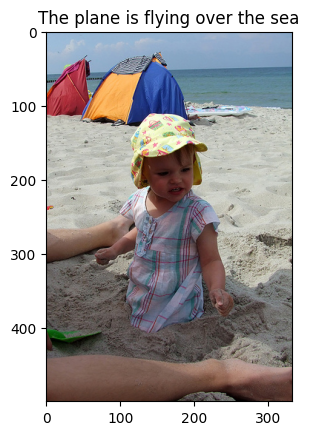

Предполагаемая оценка эксперта [0.8137379]


In [91]:
test('The plane is flying over the sea')

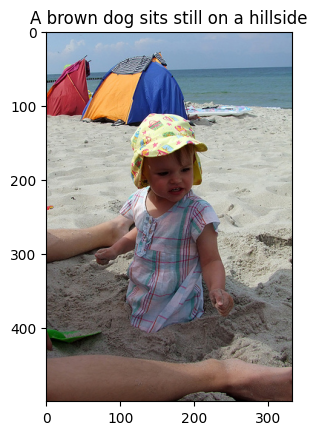

Предполагаемая оценка эксперта [0.8233596]


In [92]:
test('A brown dog sits still on a hillside')

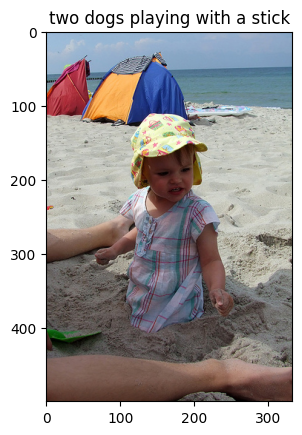

Предполагаемая оценка эксперта [0.8091079]


In [93]:
test('two dogs playing with a stick')

In [94]:
test('Two babies are squirting water guns at each other')

This image is unavailable in your country in compliance with local laws


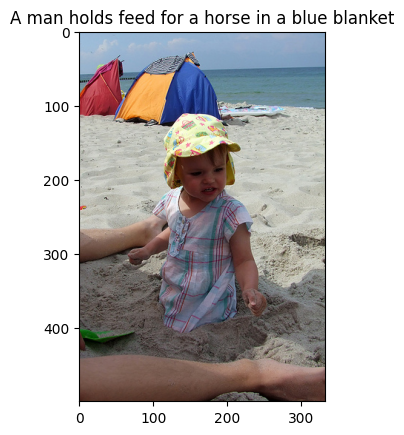

Предполагаемая оценка эксперта [0.81490654]


In [95]:
test('A man holds feed for a horse in a blue blanket')

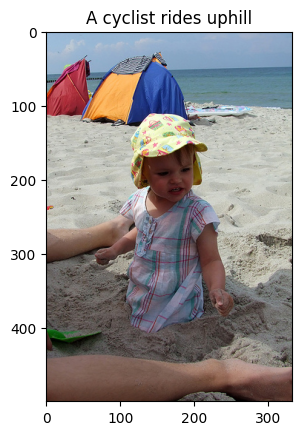

Предполагаемая оценка эксперта [0.8101641]


In [96]:
test('A cyclist rides uphill')

In [97]:
test('Two boys spraying each other with water')

This image is unavailable in your country in compliance with local laws


In [98]:
test('A group of teenagers near Simpsons characters')

This image is unavailable in your country in compliance with local laws


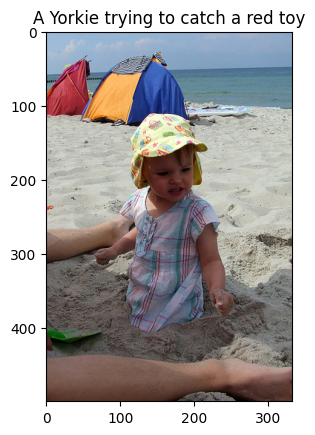

Предполагаемая оценка эксперта [0.803321]


In [99]:
test('A Yorkie trying to catch a red toy')

In [100]:
test('two girls walking in the street')

This image is unavailable in your country in compliance with local laws


## 7. Вывод

В процессе работы от нас требовалось разработать демонстрационную версию поиска изображений по запросу.
В качестве исходных данных у нас имелись: изображения, описания к ним и экспертные оценки на соответствие изображения описанию.
В начале был проведён исследовательский анализ данных, затем отобраны данные для обучения, после чего были обучены модели линейной регрессии и полносвязная нейросеть.

По результатам проверки на валидационной выборке линейная регрессия показала чуть лучше результат и при этом обучилась быстрее.
Тестирование данной модели показало её работоспособность, кроме того была решена задача по исключению "проблемного" контента (фотографии детей).

В целом модель достаточно неплохо подбирает картинки под описания но при этом сходство оценивает не достаточно хорошо.
Были опробованы как случайные описания, так и описания имеющиеся в тестовой базе.
Но тестовая база относительно не большая и по всей видимости там просто нет изображений и описаний к ним на все тематики.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>
Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Получены признаки из текста и изображений, обучены модели. 
    
    
   
Что нужно доделать обязательно:
    
   - Пожалуйста поправь пути, чтобы не нужно было менять их по всему коду.
   - Нужно дать объяснения, почему выбрана именно метрика mae
   - Нужно переписать функцию для тестирования (инференса)
    
И пожалуйста проработай все желтые комментарии. Там не очень много.
    
Жду твою работу на повторное ревью.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
</div>